# 1. Introduction

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from src.preprocessing import preprocessing, load_data, data_diabetes
from src.RForest import RForest
from src.nn_interface import MLPModel
from src.interpretability import explain_random_forest, explain_mlp, compare_models_shap

# Style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
# Cellule 2 : Préparation des données
print("Chargement et preprocessing des données...")
samples = preprocessing(data=data_diabetes, test_size=0.15, validation_size=0.15)

_, _, df, feature_names = load_data(data_diabetes)
feature_names.remove('Class')

print(f"Training set: {len(samples.X_train)} samples")
print(f"Test set: {len(samples.X_test)} samples")
print(f"Features: {len(feature_names)}")

Chargement et preprocessing des données...
Training set: 177576 samples
Test set: 38052 samples
Features: 21


In [4]:
# # Entraînement des modèles
# print("Entraînement Random Forest...")
# rf_model = RForest()
# rf_model.train(x=samples.X_train, y=samples.y_train)
# rf_score = rf_model.model.score(samples.X_test, samples.y_test)
#
# print(f"Random Forest accuracy: {rf_score:.3f}")

model_rf = RForest()
MODEL_PATH = "best_random_forest.joblib"

# Tenter de charger le modèle
if not model_rf.load_model(MODEL_PATH):
    # Si le chargement échoue (première fois ou fichier manquant), entraîner
    print("Modèle non trouvé, lancement de l'entraînement...")
    model_rf.train(samples.X_train, samples.y_train)
    # Sauvegarder après l'entraînement
    model_rf.save_model(MODEL_PATH)
else:
    print("Modèle déjà entraîné chargé.")



✅ Modèle Random Forest chargé depuis best_random_forest.joblib
Modèle déjà entraîné chargé.


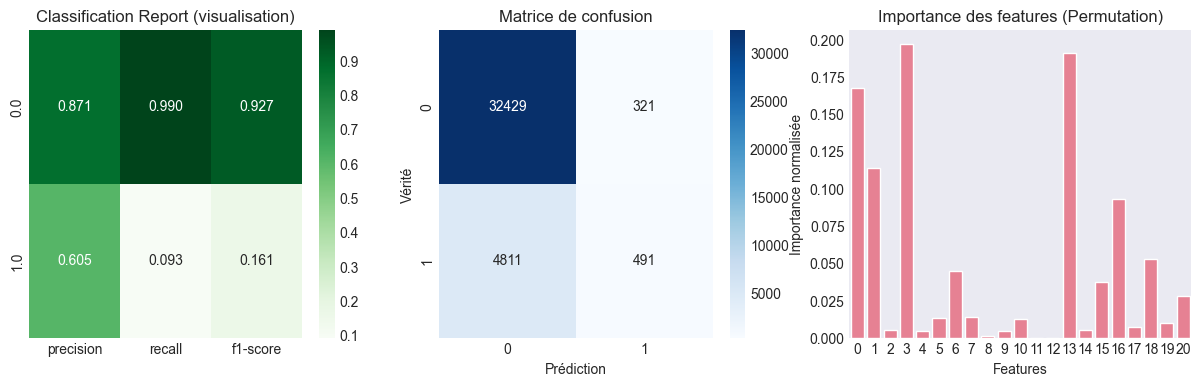

In [5]:
model_rf.benchmark(samples.X_test, samples.y_test)
rf_score = model_rf.model.score(samples.X_test, samples.y_test)

In [6]:
print("\nEntraînement MLP...")
mlp_model = MLPModel(input_size=21, epochs=15)
mlp_model.train(samples)
# Calculer score MLP
from sklearn.metrics import accuracy_score
mlp_preds = mlp_model.predict(samples.X_test)
mlp_score = accuracy_score(samples.y_test, mlp_preds)
print(f"MLP accuracy: {mlp_score:.3f}")


Entraînement MLP...
epoch: 1 	training Loss: 0.989083 
Validation loss improved → new best = 0.935038
epoch: 2 	training Loss: 0.956792 
Validation loss improved → new best = 0.930820
epoch: 3 	training Loss: 0.950549 
Validation loss improved → new best = 0.928255
epoch: 4 	training Loss: 0.948625 
Validation loss improved → new best = 0.923316
epoch: 5 	training Loss: 0.945243 
No improvement in validation loss (current: 0.929275, best: 0.923316) → reverting weights
epoch: 6 	training Loss: 0.943996 
No improvement in validation loss (current: 0.923791, best: 0.923316) → reverting weights
epoch: 7 	training Loss: 0.943284 
Validation loss improved → new best = 0.922450
epoch: 8 	training Loss: 0.940867 
Validation loss improved → new best = 0.921616
epoch: 9 	training Loss: 0.939010 
No improvement in validation loss (current: 0.921900, best: 0.921616) → reverting weights
epoch: 10 	training Loss: 0.938039 
No improvement in validation loss (current: 0.924971, best: 0.921616) → reve

# 2. Random Forest SHAP Analysis

=== Analyse SHAP - Random Forest ===
Création du TreeExplainer...
Calcul des SHAP values sur 1000 samples...
Génération des graphiques...


<Figure size 1000x600 with 0 Axes>

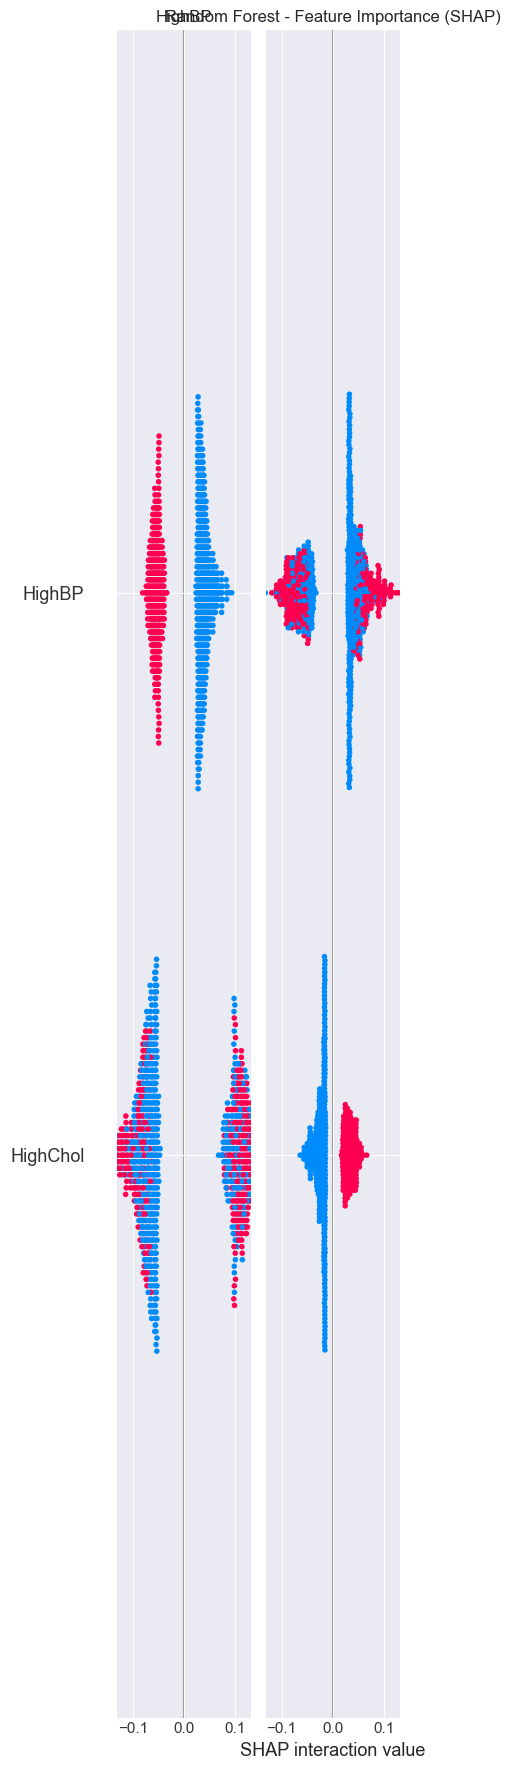

<Figure size 1000x600 with 0 Axes>

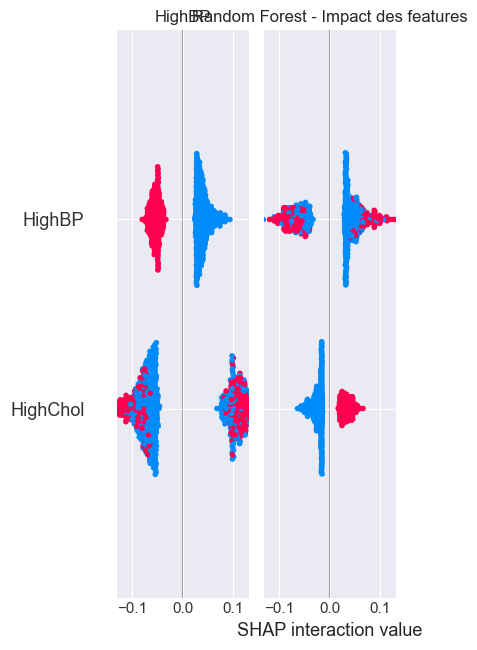

✅ Analyse SHAP Random Forest terminée


In [7]:
# Limite pour la vitesse
n_samples = 1000
X_test_sample = samples.X_test[:n_samples]

# Calcul SHAP
rf_shap, rf_explainer = model_rf.explain(
    model=model_rf.model,
    X_train=samples.X_train,
    X_test=X_test_sample,
    feature_names=feature_names,
    max_samples=1000
)

=== Analyse SHAP - MLP PyTorch ===
Modèle en mode évaluation
Sélection de 100 samples pour le background...
Limitation à 200 samples (sur 1000)...
Création du KernelExplainer...
Calcul des SHAP values sur 200 samples...
(Cela peut prendre 2-3 minutes...)


100%|██████████| 200/200 [00:17<00:00, 11.32it/s]


SHAP values calculées ! Shape: (200, 21)
Génération des graphiques...


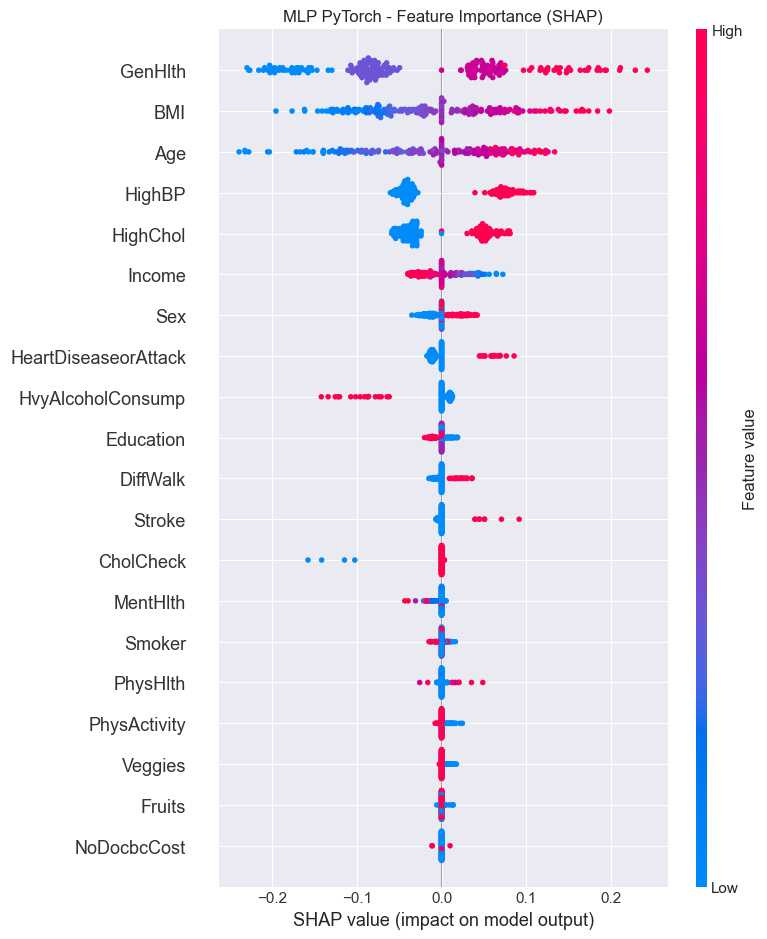

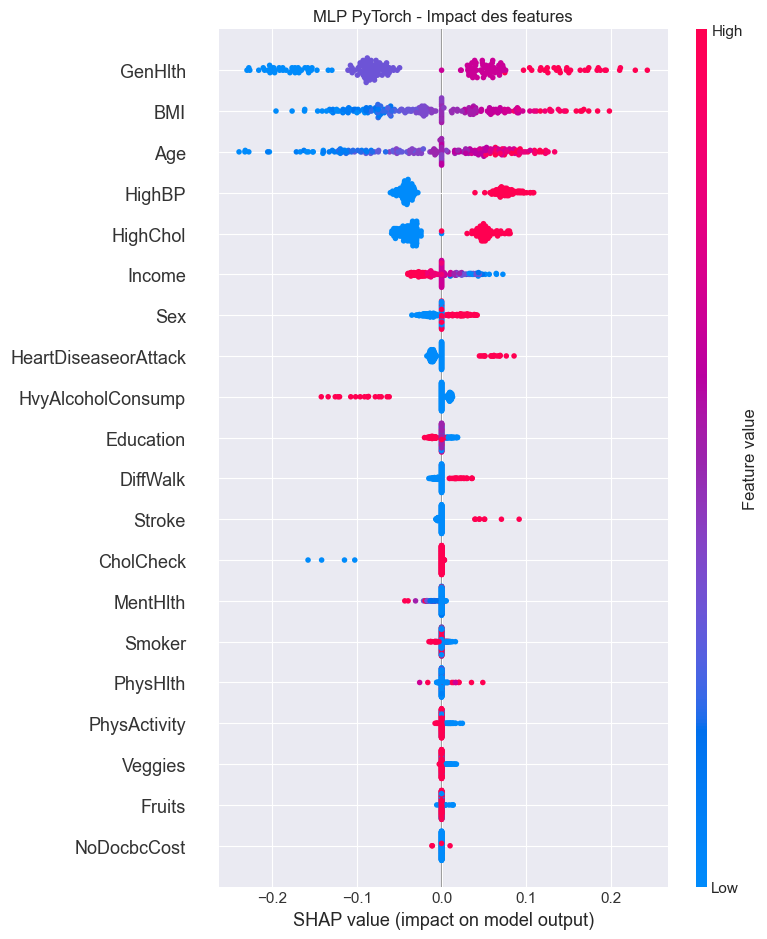


Génération du WaterFall Plot pour l'échantillon 0...


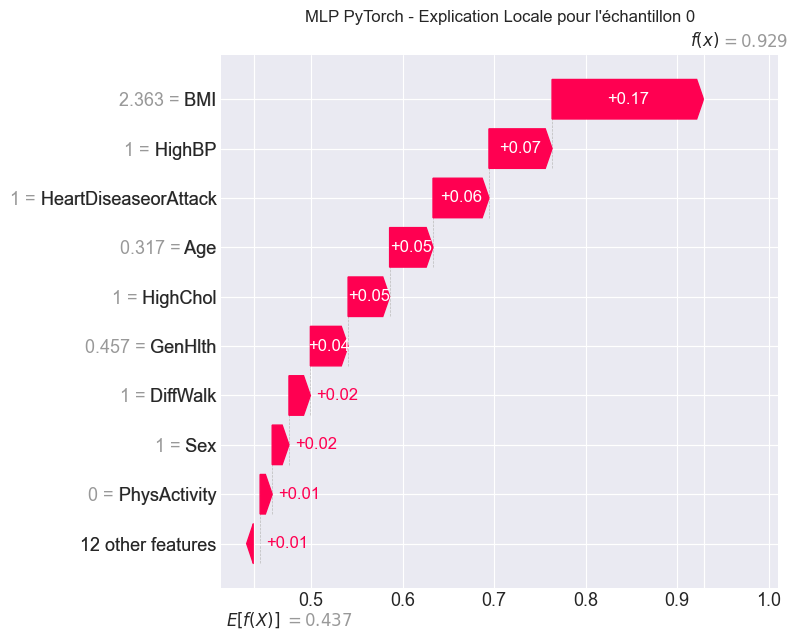

✅ Analyse SHAP MLP terminée


In [8]:
mlp_shap, mlp_explainer = mlp_model.explain(
    model=mlp_model.model,
    X_train=samples.X_train,
    X_test=X_test_sample,
    feature_names=feature_names,
    n_background=100,
    n_test_samples=200
)

## 2.1 Summary plot global

## 2.2 Summary plot détaillé

## 2.3 Waterfalls

## 2.4 Dépendance plots

# 3. MLP - SHP Analysis

# 4. Comparaison MLP vs RF

## 4.1 Feature importance comparative

## 4.2 Différences d'interprétation

# 5. Conslusions